# Rete convoluzionale per MNIST

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [29]:
num_filters = 8
filter_size = 3
stride=1 # Default
padding='valid' # Default 
pool_size = 2

model = Sequential()

model.add(Conv2D(activation='sigmoid', filters=num_filters, kernel_size=filter_size, strides=stride, padding=padding, input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.3))
model.add(Flatten()) # Esercizio: cosa fa? A cosa serve?
model.add(Dense(10, activation='softmax'))




trainable_parameters number

In [23]:
print((filter_size*filter_size+1)*num_filters)
print((13*13*num_filters*10+10))
model.summary()

80
13530
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 8)         0         
                                                                 
 flatten_2 (Flatten)         (None, 1352)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________

## dataset

In [24]:
(data,labels), (data_test,labels_test)=mnist.load_data() # load data.

# Check data
print(data.shape) # 60000 immagini 28x28
print(data[42].shape) 
print(data[42][21]) # gray scale. int [0 , 255]

# Normalization & conversion
data=data/255-0.5
data_test=data_test/255-0.5
data=data.reshape(-1,28,28,1)
data_test=data_test.reshape(-1,28,28,1)

# Check again
print(data.shape) # 60000 immagini 28x28
print(data[42].shape) 
print(data[42][21]) # gray scale. int [0 , 255]

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(labels, num_classes=10)
one_hot_labels_test = to_categorical(labels_test, num_classes=10)

(60000, 28, 28)
(28, 28)
[  0   0   0   0   0   0   0   0   0   0   0   0   0  91 254  77   0   0
   0   0   0   0   0   0   0   0   0   0]
(60000, 28, 28, 1)
(28, 28, 1)
[[-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.14313725]
 [ 0.49607843]
 [-0.19803922]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]
 [-0.5       ]]


## Training

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,LearningRateScheduler,TensorBoard

mc=ModelCheckpoint('best_model_CNN.hdf5', monitor='accuracy', save_best_only=True, verbose=1)
es=EarlyStopping(verbose=2, monitor='val_loss',min_delta=0.001,patience=5)

# learning rate 0.001 per le prime 10 epoche, poi decresce esponenzialmente.
def scheduler(epoch):
  if epoch < 10:
    return 0.01
  else:
    return 0.01 * tf.math.exp(0.1 * (10 - epoch))

lrs=LearningRateScheduler(scheduler)

model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.optimizer.get_config()


{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [31]:
history=model.fit(data, one_hot_labels, validation_split=0.1, epochs=100, batch_size=32, callbacks=[es,mc,lrs])

Epoch 1/100
1671/1688 [============================>.] - ETA: 0s - loss: 1.3760 - accuracy: 0.5638
Epoch 1: accuracy improved from -inf to 0.56637, saving model to best_model_CNN.hdf5
1688/1688 [==============================] - 6s 3ms/step - loss: 1.3690 - accuracy: 0.5664 - val_loss: 0.5146 - val_accuracy: 0.8790 - lr: 0.0100
Epoch 2/100
1682/1688 [============================>.] - ETA: 0s - loss: 0.5612 - accuracy: 0.8350
Epoch 2: accuracy improved from 0.56637 to 0.83511, saving model to best_model_CNN.hdf5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5611 - accuracy: 0.8351 - val_loss: 0.3678 - val_accuracy: 0.9015 - lr: 0.0100
Epoch 3/100
1688/1688 [==============================] - ETA: 0s - loss: 0.4765 - accuracy: 0.8559
Epoch 3: accuracy improved from 0.83511 to 0.85587, saving model to best_model_CNN.hdf5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4765 - accuracy: 0.8559 - val_loss: 0.3205 - val_accuracy: 0.9113 - lr: 0.0100
Epoc

## Test

In [32]:
# accuracy and loss defined in compile.
model.evaluate(data_test, one_hot_labels_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2744 - accuracy: 0.9206


[0.2744196951389313, 0.9205999970436096]

## Saving and evaluation

In [33]:
#test delete
model.save('conv.h5')  # creates a HDF5 file
del model

In [34]:
# load model
model = tf.keras.models.load_model('conv.h5')
predictions = model.predict(data_test[:2])
print(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 42ms/step
[7 2]


## wrong predictions visualization

In [35]:
predictions=model.predict(data_test)
errors=[i for i,x in enumerate(data_test) if labels_test[i]!=np.argmax(predictions[i])]
print(errors)
len(errors)

313/313 [==============================] - 0s 1ms/step
[8, 33, 63, 66, 92, 124, 149, 193, 195, 217, 233, 241, 245, 247, 259, 290, 300, 307, 313, 318, 320, 321, 325, 340, 341, 352, 362, 380, 381, 403, 406, 412, 444, 445, 448, 468, 478, 479, 502, 507, 511, 515, 531, 542, 543, 551, 565, 569, 578, 582, 591, 605, 606, 610, 613, 619, 624, 628, 629, 658, 659, 684, 691, 692, 707, 714, 717, 720, 728, 738, 740, 741, 760, 781, 791, 800, 839, 844, 857, 877, 881, 882, 898, 924, 938, 939, 944, 947, 950, 956, 959, 965, 975, 982, 999, 1003, 1012, 1014, 1028, 1039, 1044, 1050, 1062, 1068, 1073, 1082, 1101, 1107, 1112, 1114, 1119, 1173, 1181, 1191, 1192, 1194, 1198, 1200, 1202, 1204, 1206, 1208, 1226, 1232, 1233, 1234, 1242, 1247, 1248, 1253, 1256, 1260, 1269, 1283, 1299, 1310, 1319, 1320, 1325, 1326, 1328, 1337, 1347, 1364, 1375, 1378, 1393, 1409, 1410, 1429, 1440, 1444, 1453, 1466, 1467, 1476, 1494, 1500, 1514, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1609, 1621, 1626, 1634, 1640, 1671, 1

794

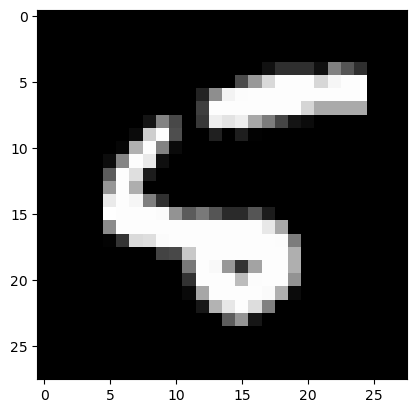

Model prediction: 6


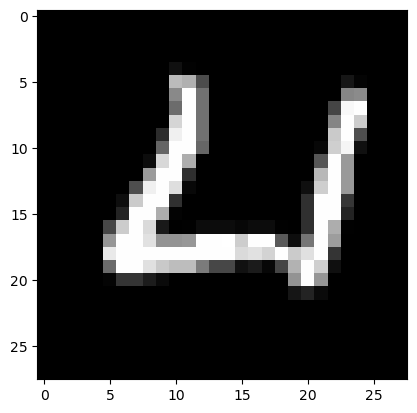

Model prediction: 5


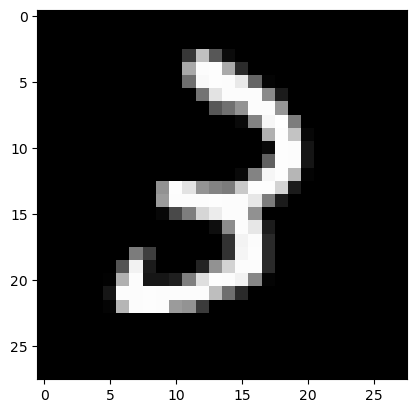

Model prediction: 2


In [36]:
for i in errors[:3]:
    plt.imshow(np.reshape(data_test[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions[i]))